In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [76]:
def single_map(cato):
    
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/census_shp")
    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    
    menu = pd.read_csv("menu.csv")
    key = menu.loc[cato,"key"]
    fullName = menu.loc[cato,"full_name"]
    
    ax=gdf.plot(column=key, cmap='BuPu',figsize=(12,12),legend=True,alpha=0.35
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()    
    ax.title.set_text(fullName)
    
    return ax
    


In [77]:
def print_menu():
    menu = pd.read_csv("menu.csv")
    for ix,row in menu.iterrows():
        print(str(ix)+":"+row["full_name"])

In [85]:
def combine_map(catoes,ratio):
    
    if len(catoes)!=len(ratio):
         raise Exception('the number of catoes and ratio should be the same')
            
    processDic = {}
    for idx in range(len(catoes)):
        processDic[catoes[idx]] = ratio[idx]/sum(ratio)
        
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/standardized_census_shp")
    menu = pd.read_csv("menu.csv")
    df_cen['utility_map'] = 0
    
    # construct the utility function
    for cato in catoes:
        key = menu.loc[cato,"key"]
        df_cen['utility_map'] += processDic[cato]*df_cen[key]

    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    ax=gdf.plot(column='utility_map', cmap='BuPu',figsize=(12,12),legend=True,alpha=0.35
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    cb_ax = fig.axes[1] 
    cb_ax.tick_params(labelsize=20)   
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()
    return ax
    


<AxesSubplot:>

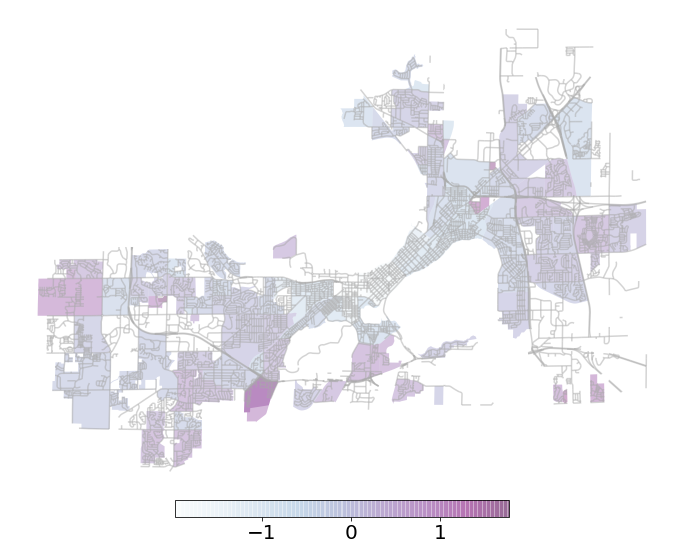

In [86]:
combine_map([4,5,6],[0.2,0.8,0.4])

<AxesSubplot:title={'center':'Young Children - Age 0 to 4 (Census 2010)'}>

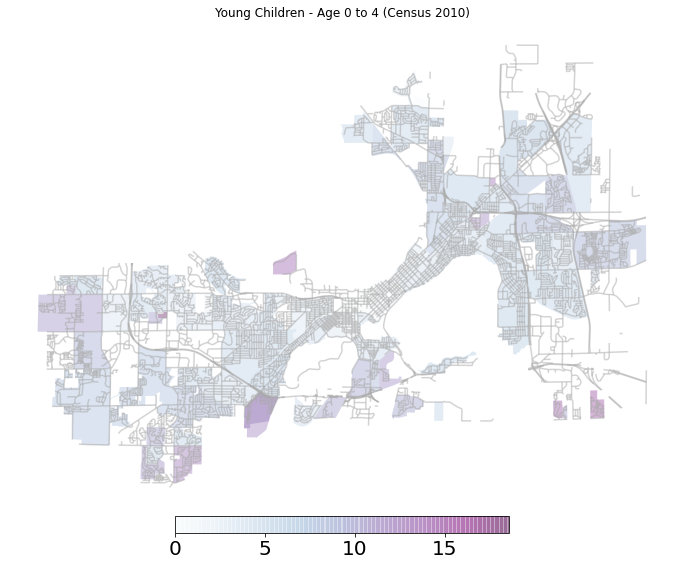

In [81]:
single_map(4)